In [1]:
import random
import math
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   global theorical
   if(comp[0]>=theorical*1.5):
        global aux
        aux += 1
   times.append(comp[0])

In [3]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [4]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp

   return rightmark,compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    # Create an array of 1 .. n  
    n=s
    global theorical
    theorical = n*math.log2(n)
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print("n",n)
    print("runs",runs)
    print("theorical ",theorical)
    print("mean",statistics.mean(tlist))
    print("diference ", statistics.mean(tlist)-theorical)
    print("relation ", statistics.mean(tlist)/theorical)
    print("stdev",statistics.stdev(tlist))
    print("min",min(tlist))
    print("max",max(tlist))
    print("probability it takes more than 1.5 times more than the theoretical average", aux/r)
    print("times you can run in 5 hours ", (10**9*3600*5)/(statistics.mean(tlist)))

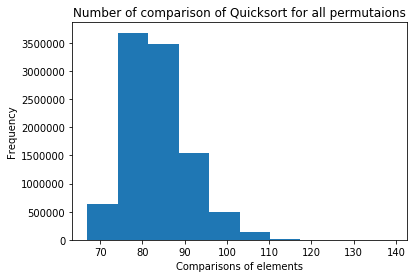

n 16
runs 10000000
theorical  64.0
mean 83.6637454
diference  19.663745399999996
relation  1.307246021875
stdev 7.091596017332928
min 67
max 139
probability it takes more than 1.5 times more than the theoretical average 0.0657609
times you can run in 5 hours  215146954202.69818


In [6]:
theorical = 0
aux = 0
randomquicksorttimedistrib(16,10000000)

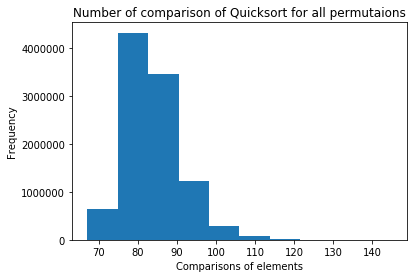

n 16
runs 10000000
theorical  64.0
mean 83.6650105
diference  19.665010499999994
relation  1.3072657890625
stdev 7.094572585306726
min 67
max 145
probability it takes more than 1.5 times more than the theoretical average 0.0659148
times you can run in 5 hours  215143700962.06467


In [7]:
theorical = 0
aux = 0
randomquicksorttimedistrib(16,10000000)